# Chapter1. 전국 신규 민간 아파트 분양가 분석

## 데이터 로드 후 데이터셋 미리보기

In [1]:
# pandas로 csv load
import pandas as ad
import numpy as np

In [2]:
# df_last , shape 행열보기
df_last=ad.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding="euc-kr")
df_last.shape

(4335, 5)

In [3]:
# head 미리보기
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
# tail 미리보기
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [5]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: D8AF-48F5

 C:\Users\my\InflearnData\data 디렉터리

2022-07-04  오후 04:43    <DIR>          .
2022-07-04  오후 04:43    <DIR>          ..
2022-07-04  오후 04:42    <DIR>          .ipynb_checkpoints
2022-07-04  오후 04:43            57,732 seoul_municipalities_geo_simple.json
2022-07-04  오후 04:43       264,920,940 상가업소정보_201912_01.csv
2022-07-04  오후 04:43             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2022-07-04  오후 04:43         3,788,824 전국도시공원표준데이터.csv
2022-07-04  오후 04:43           162,510 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv
               5개 파일         268,932,169 바이트
               3개 디렉터리  64,462,303,232 바이트 남음


In [6]:
# df_first 불러오기
df_first=ad.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="euc-kr")
df_first.shape

(17, 22)

In [7]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하고 타입변경

In [9]:
df_last.info() #index,결측치 등 보기(NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [10]:
df_last.isnull().sum() #결측치 여부와 갯수,합계구하기

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [11]:
df_last.isna().sum() #결측치 여부와 갯수,합계구하기

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [12]:
type(ad.np.nan)

C:\Users\my\AppData\Local\Temp\ipykernel_17468\1037076644.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  type(ad.np.nan)


float

In [13]:
df_last["분양가격"]=ad.to_numeric(df_last["분양가격(㎡)"],errors='coerce') #datatype float로 변경시 공백 무시 후 바꿈
df_last["분양가격"] #mean(평균),max(최대값) ...

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4330    3882.0
4331       NaN
4332    3898.0
4333       NaN
4334    3601.0
Name: 분양가격, Length: 4335, dtype: float64

In [14]:
df_last["평당분양가격"]=df_last["분양가격"]*3.3 # 2013~ 데이터와 기분 맞추기 3.3곱해서 평균분양가격기준으로 만들기
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0,12810.6
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0,12863.4
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,NaN


## 분양가격 요약

In [15]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [16]:
df_last["분양가격(㎡)"].describe() #변경 전 컬럼 요약, object-> count 공백데이터 포함, unique-> 중복없음, top->빈번한데이터,freq->최빈수

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [17]:
df_last["분양가격"].describe() #수치데이터로 변경 후 요약 mean->평균값, std->표준편차, 50%-> 중앙값(평균과 차이 비교 중요)

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

## 규모구분을 전용면적 컬럼으로 변경

In [18]:
df_last["전용면적"]= df_last["규모구분"].str.replace("전용면적" ,"") #str.replace 로 문자열 변경
df_last["전용면적"]=df_last["전용면적"].str.replace ("초과","~")
df_last["전용면적"]= df_last["전용면적"].str.replace ("이하","")
df_last["전용면적"]=df_last["전용면적"].str.replace (" ","").str.strip() #앞뒤공백제거
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [19]:
#drop 삭제 drop?->옵션
df_last=df_last.drop(["규모구분","분양가격(㎡)"],axis=1) #axis 0행 1열 OR drop(coulmn["규모구분","분양가격(㎡)"])

In [20]:
df_last.info() #메모리 사용량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   연도      4335 non-null   int64  
 2   월       4335 non-null   int64  
 3   분양가격    3957 non-null   float64
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 203.3+ KB


## groupby로 데이터 집계

In [21]:
df_last.groupby(["지역명"])["평당분양가격"].mean() #지역별 평당분양가격 평균

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

In [22]:
df_last.groupby(["지역명"])["평당분양가격"].sum() #지역별 평당분양가격 합계

지역명
강원    1909561.5
경기    3339223.8
경남    2289388.2
경북    2018745.3
광주    2000258.7
대구    2899376.7
대전    2030160.0
부산    3021780.3
서울    5899994.1
세종    2321774.4
울산    1492220.4
인천    2931168.9
전남    1876198.5
전북    1915610.4
제주    2461839.6
충남    1967842.8
충북    1908663.9
Name: 평당분양가격, dtype: float64

In [23]:
df_last.groupby(["지역명"])["평당분양가격"].max() #지역별 평당분양가격 최대값

지역명
강원    11873.4
경기    18711.0
경남    14199.9
경북    11408.1
광주    16107.3
대구    17021.4
대전    16094.1
부산    15255.9
서울    42002.4
세종    12972.3
울산    11860.2
인천    17120.4
전남    10074.9
전북    10071.6
제주    18024.6
충남    10563.3
충북     9421.5
Name: 평당분양가격, dtype: float64

In [24]:
df_last.groupby(["지역명"])["평당분양가격"].describe() #요약

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [25]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [26]:
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round() 
#지역명,전용면적 순으로 평당분양가격 평균,컬럼값으로 지정,소수점삭제

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.0,7567.0,7486.0,8750.0,7478.0
경기,14772.0,13252.0,12524.0,13678.0,12560.0
경남,10358.0,8689.0,8619.0,10018.0,8659.0
경북,9157.0,7883.0,8061.0,8774.0,8079.0
광주,11042.0,9431.0,9911.0,9296.0,9904.0
대구,13087.0,11992.0,11779.0,11141.0,11771.0
대전,14877.0,9176.0,9711.0,9037.0,9786.0
부산,13208.0,11354.0,11865.0,12073.0,11936.0
서울,23446.0,23213.0,22787.0,25944.0,22610.0


In [27]:
df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round().T
#행열 transpose

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


## 피벗테이블로 데이터 집계

In [28]:
#df_last.groupby(["지역명"])["평당분양가격"].mean()
ad.pivot_table(df_last,index="지역명",values="평당분양가격",aggfunc="mean").round()

,평당분양가격
지역명,
강원,7891.0
경기,13357.0
경남,9269.0
경북,8377.0
광주,9952.0
대구,11981.0
대전,10253.0
부산,12087.0
서울,23600.0


In [29]:
#df_last.groupby(["전용면적"])["평당분양가격"].mean()
ad.pivot_table(df_last,index="전용면적",values="평당분양가격",aggfunc="mean").round()

,평당분양가격
전용면적,
102㎡~,11518.0
60㎡,10375.0
60㎡~85㎡,10271.0
85㎡~102㎡,11098.0
전체,10276.0


In [30]:
#df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean().unstack().round() 
df_last.pivot_table(index=["전용면적"],values="평당분양가격",aggfunc="mean",columns="지역명").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [31]:
#df_last.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round().T
d=df_last.pivot_table(index=["연도","지역명"],values="평당분양가격",aggfunc="mean")
d.loc[2017]

,평당분양가격
지역명,
강원,7273.560000
경기,12304.980000
경남,8786.760000
경북,8280.800000
광주,9613.977551
대구,12206.700000
대전,9957.158491
부산,11560.680000
서울,21831.060000


## 최근데이터 시각화

In [32]:
import matplotlib.pyplot as plt

plt.rc("font",family="Malgun Gothic")

<AxesSubplot:xlabel='지역명'>

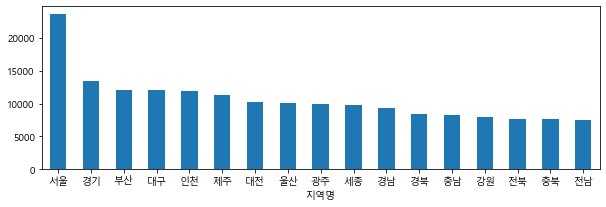

In [33]:
g=df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False) #내림차순정렬
g.plot.bar(rot=0,figsize=(10,3)) #막대그래프

<AxesSubplot:xlabel='전용면적'>

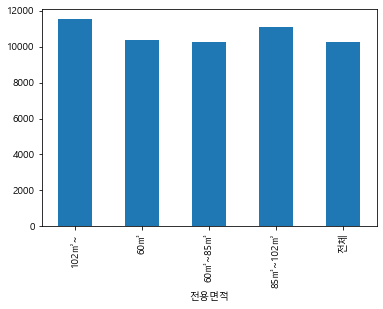

In [34]:
a=df_last.groupby(["전용면적"])["평당분양가격"].mean() #전용면적의 분양가격 막대그래프
a.plot.bar()

<AxesSubplot:xlabel='연도'>

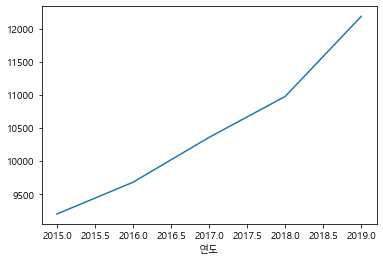

In [35]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

## boxplot 5가지 수치 이해하기 , 분양가 시각화

<AxesSubplot:>

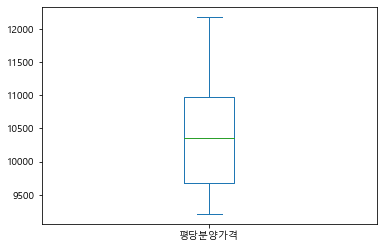

In [36]:
df_last.pivot_table(index="연도",values="평당분양가격").plot.box() #min,제1사분위수,제2사분위수(중앙),제3사분위수,max

<AxesSubplot:>

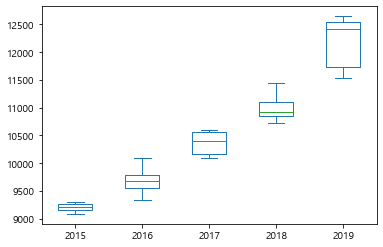

In [37]:
df_last.pivot_table(index="월",columns="연도",values="평당분양가격").plot.box() #min,제1사분위수,제2사분위수(중앙),제3사분위수,max

<AxesSubplot:>

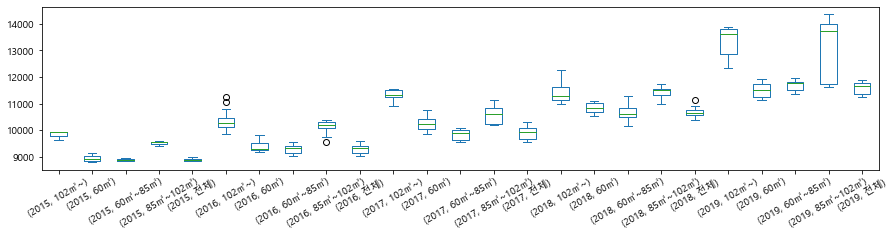

In [38]:
p=df_last.pivot_table(index="월",columns=["연도","전용면적"],values="평당분양가격")
p.plot.box(figsize=(15,3),rot=30)#min,제1사분위수,제2사분위수(중앙),제3사분위수,max

<AxesSubplot:xlabel='월'>

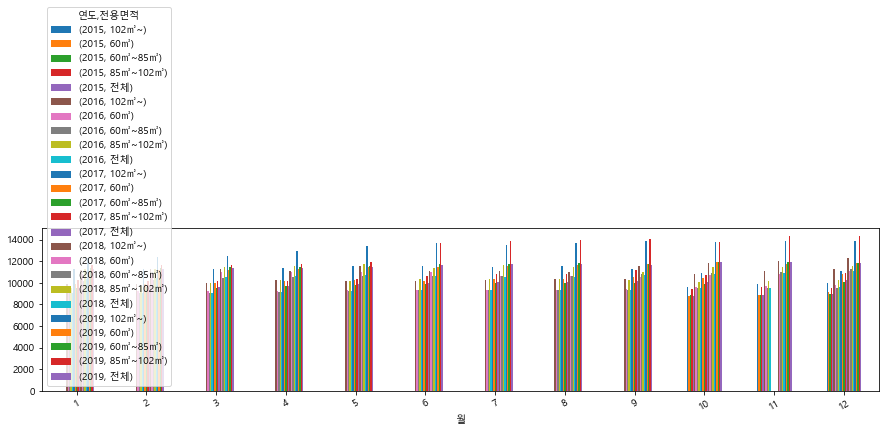

In [39]:
p.plot.bar(figsize=(15,3),rot=30)

<AxesSubplot:xlabel='연도'>

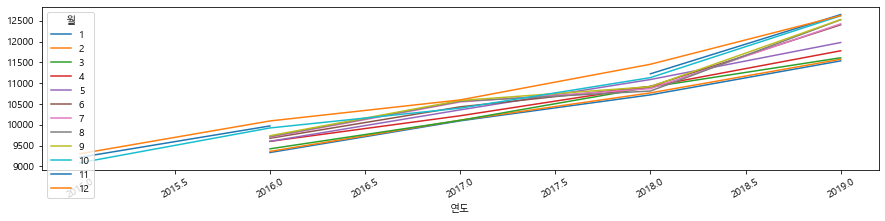

In [40]:
p=df_last.pivot_table(index="연도",columns=["월"],values="평당분양가격")
p.plot.line(figsize=(15,3),rot=30)

## Seaborn 시각화

In [41]:
import seaborn as sns #통계적 연산

%matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

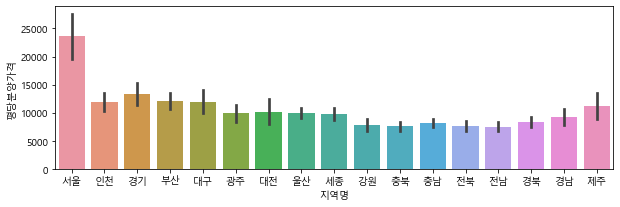

In [42]:
#barplot
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명",y="평당분양가격", ci="sd") #Ci=sd, 표준편차

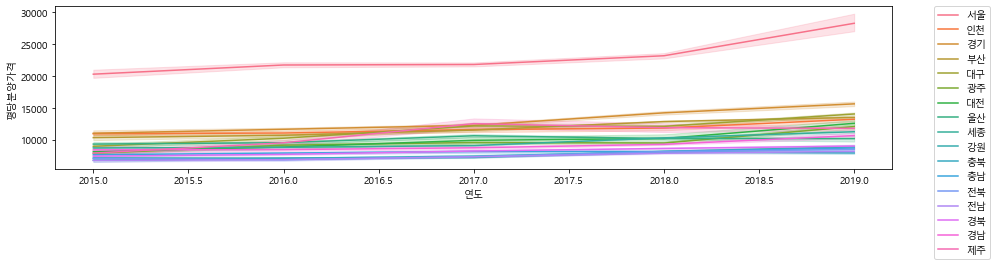

In [43]:
#lineplot
plt.figure(figsize=(15,3))
sns.lineplot(data=df_last,x="연도",y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.) #;egend 떨어뜨리기

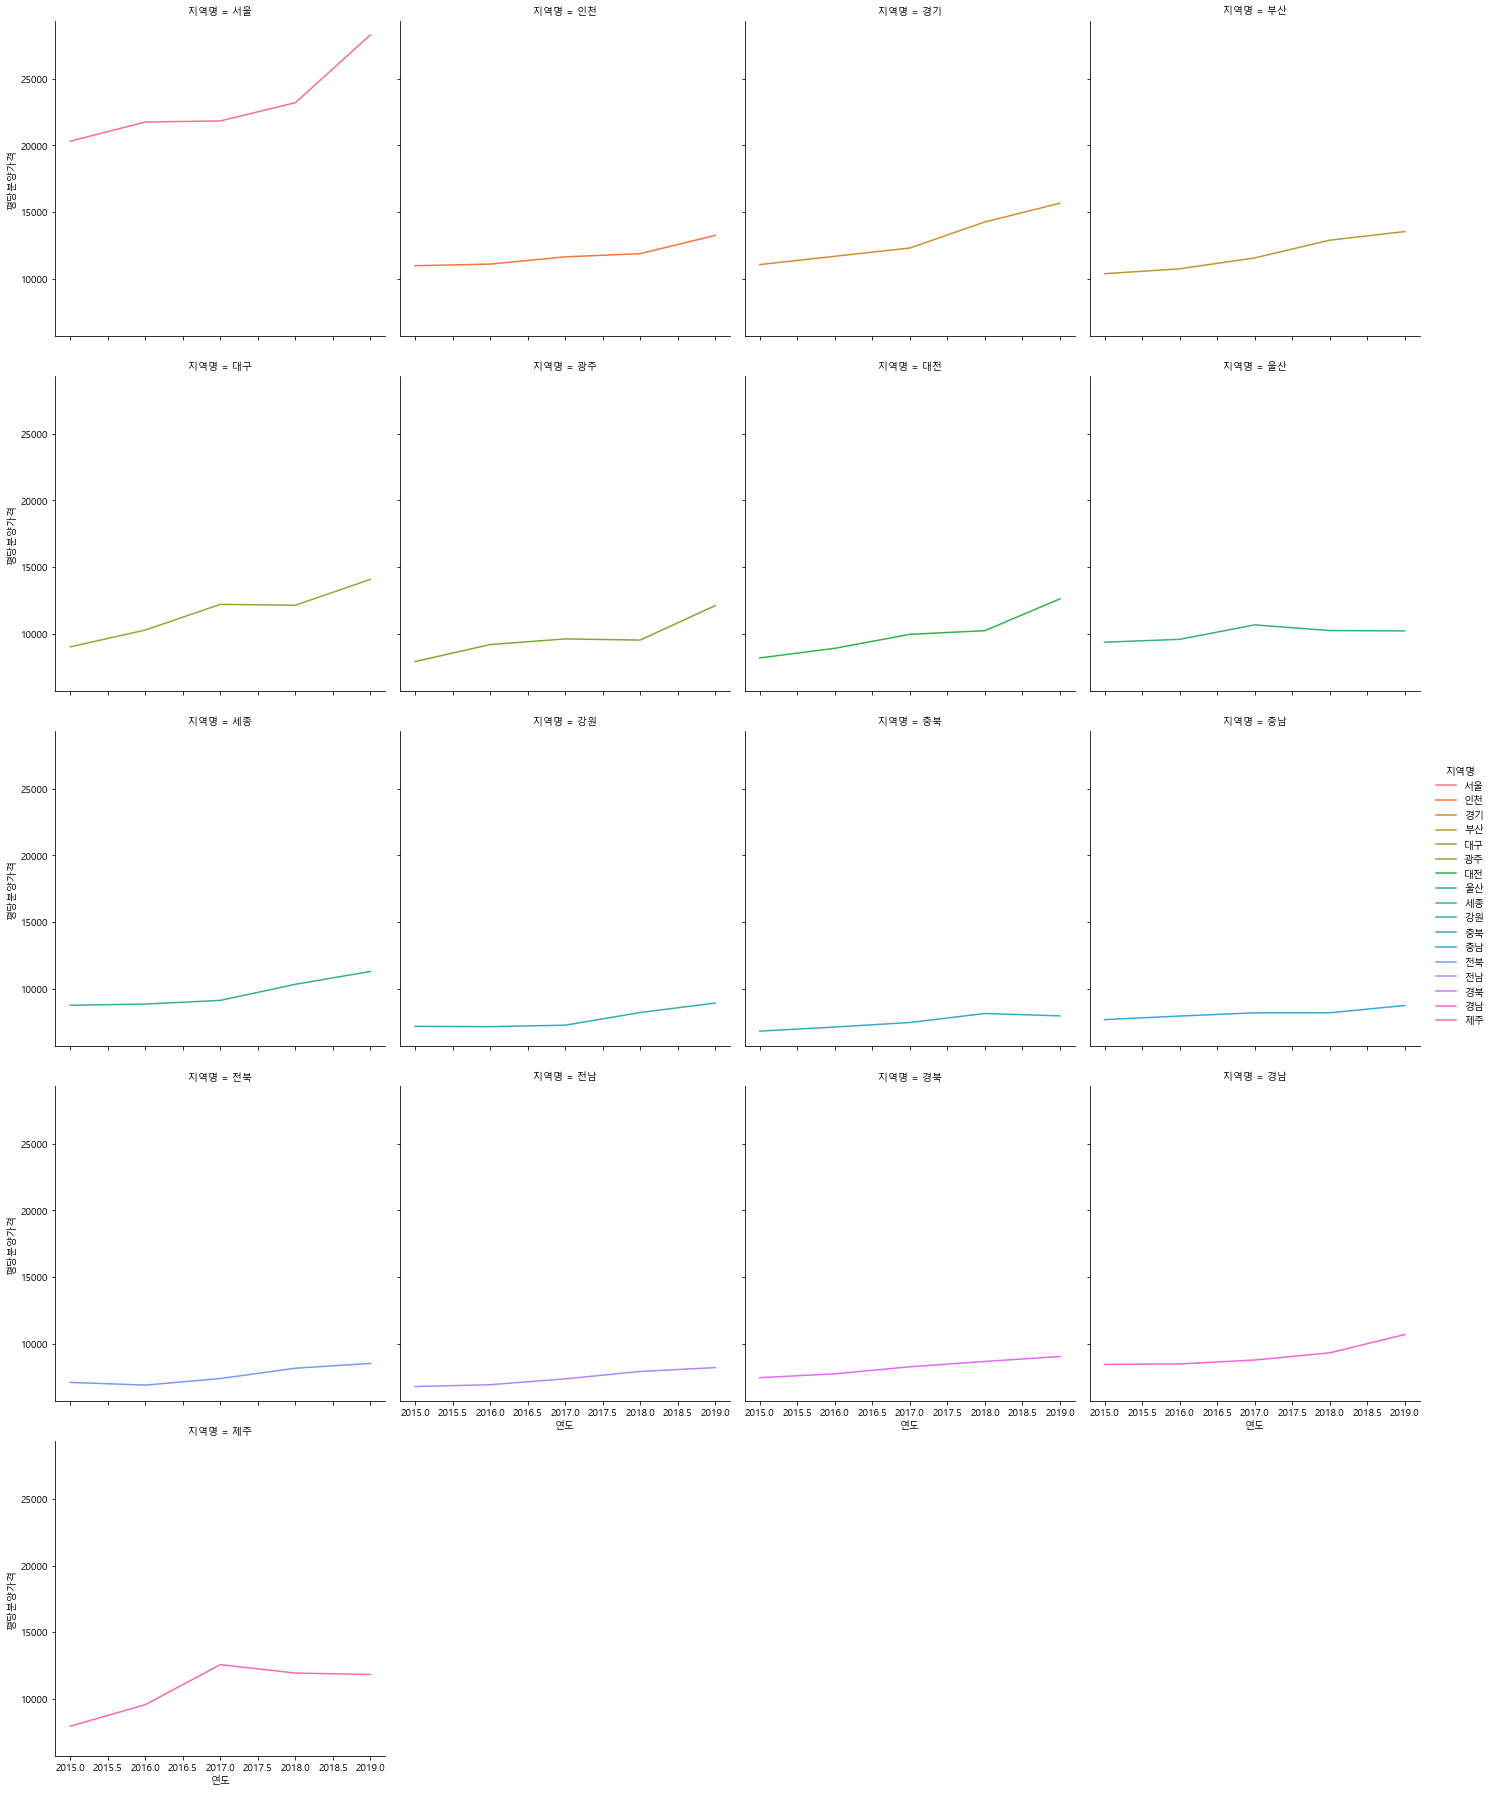

In [44]:
#relplot
sns.relplot(data=df_last, x="연도",y="평당분양가격", kind="line", hue="지역명", col="지역명", col_wrap=4, ci=None) #지역별로 서브플롯을 한줄에 4개

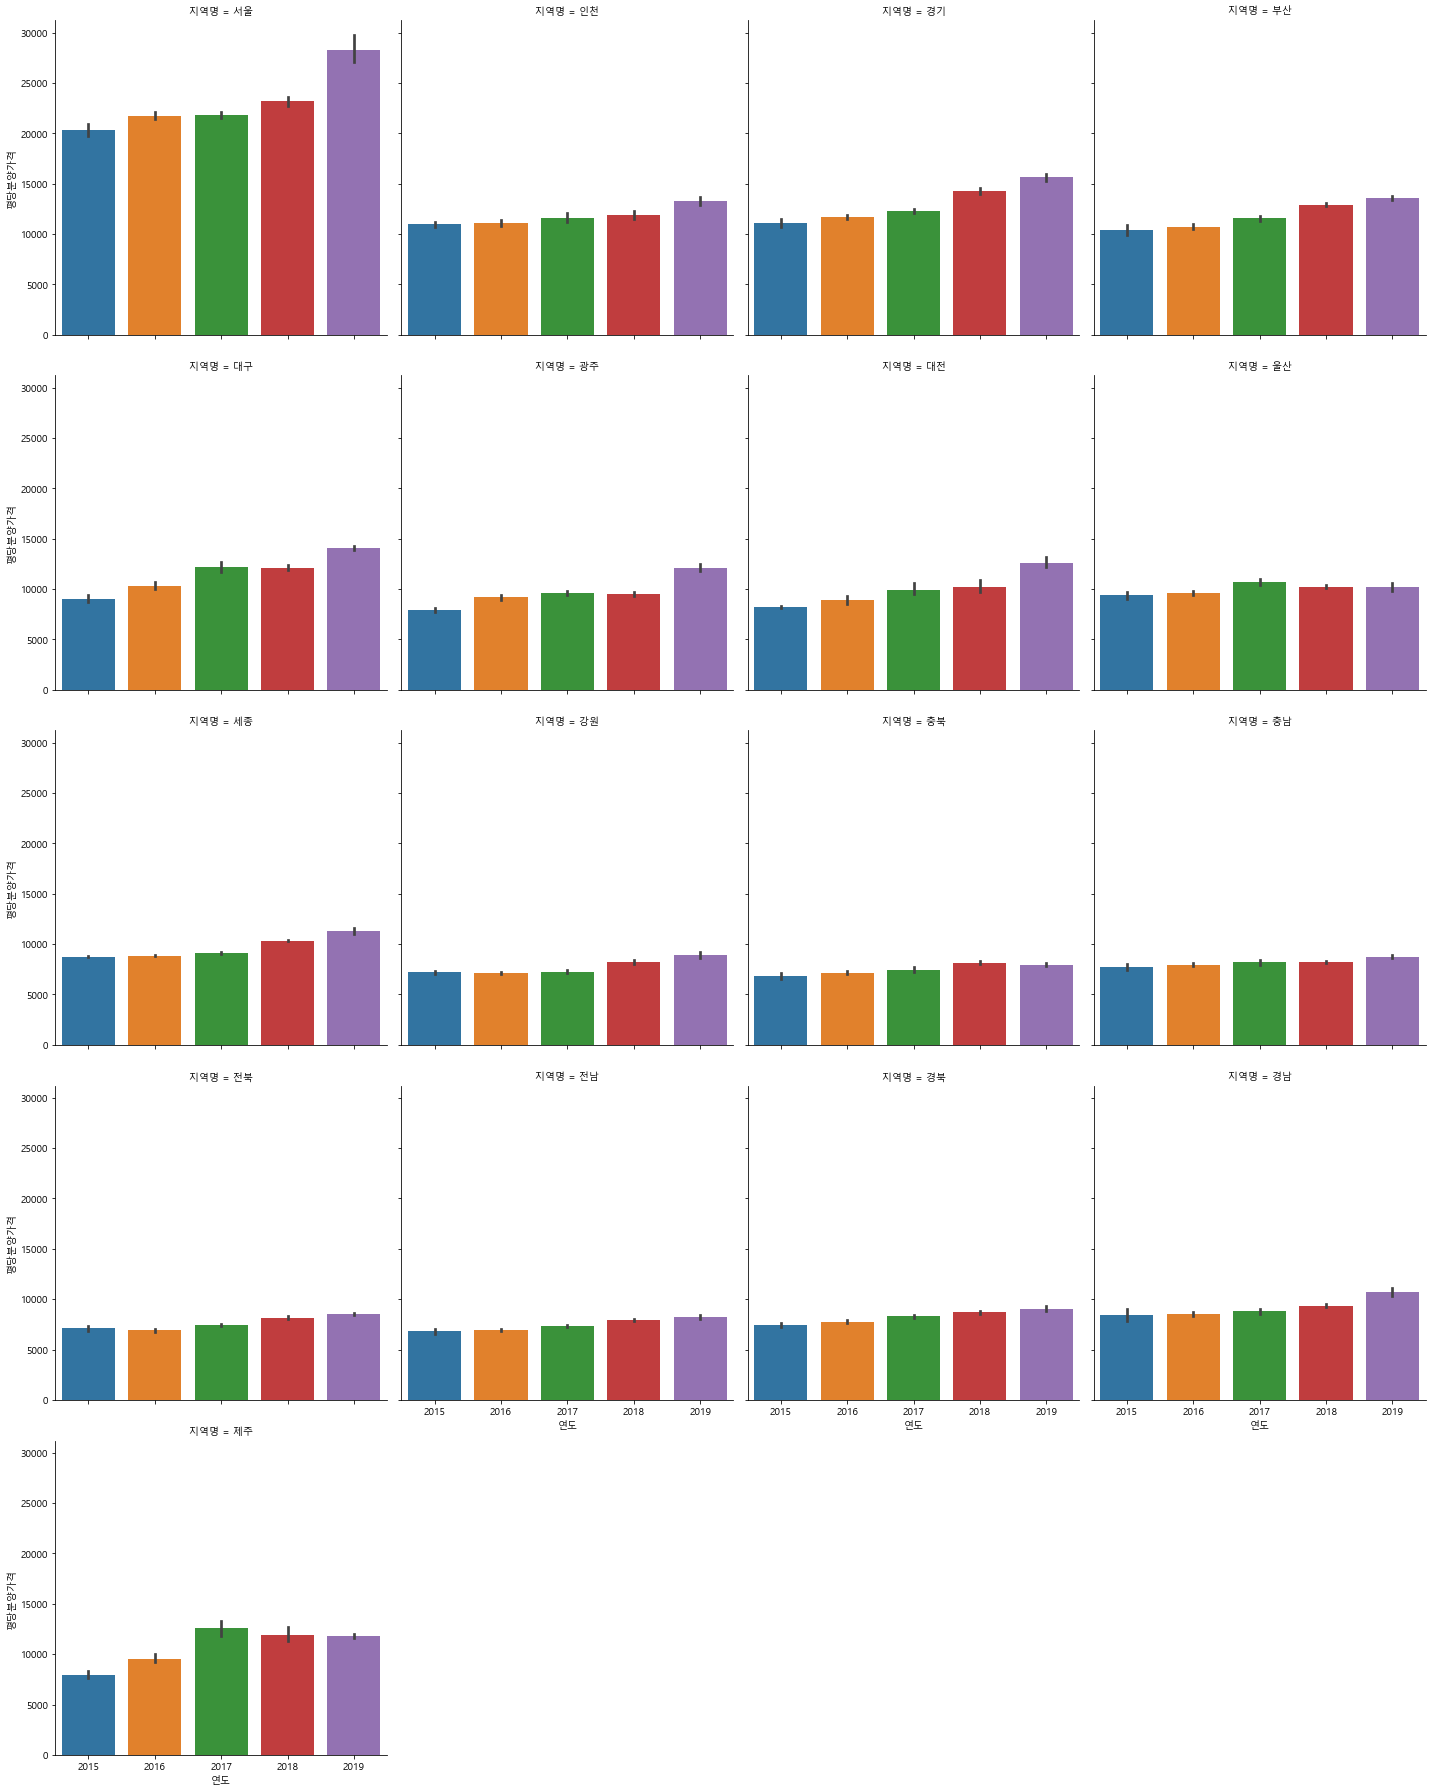

In [45]:
#catplot
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

## Seaborn boxplot, violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

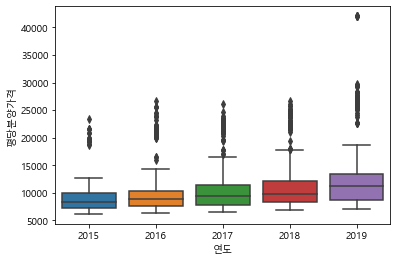

In [46]:
#boxplot
sns.boxplot(data=df_last, x="연도",y="평당분양가격") #hue=> 카테고리적을 때

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

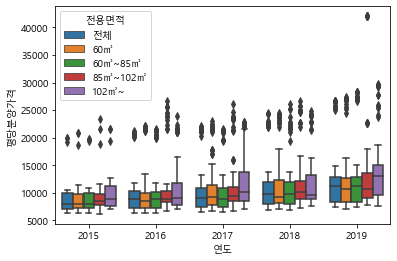

In [47]:
#boxplot =>데이터 이상치, 양 확인가능 분포 확인 어려움
sns.boxplot(data=df_last, x="연도",y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

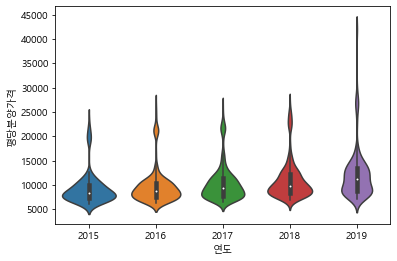

In [48]:
#violinplot  => low data 분포정도까지 확인 가능
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

## lmplot, swarmplot

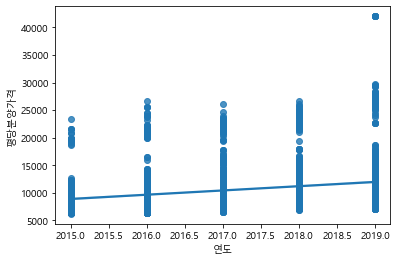

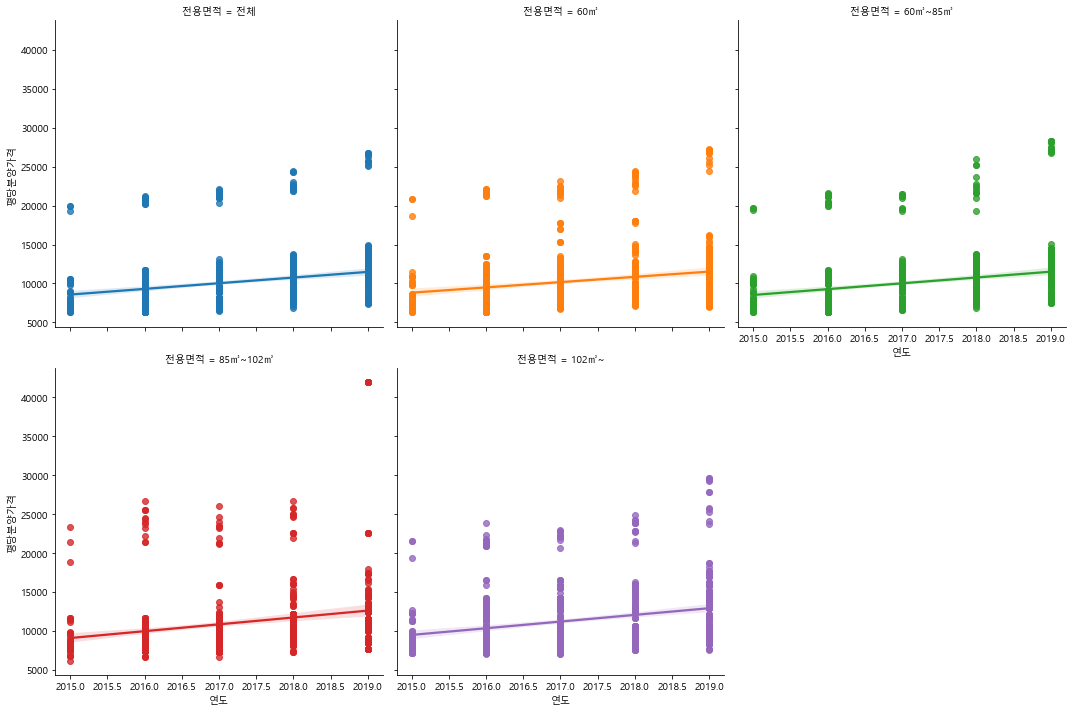

In [49]:
# regplot
sns.regplot(data=df_last ,x="연도",y="평당분양가격" ) #양의 상관관계 hue 없음
#lmplot
sns.lmplot(data=df_last ,x="연도",y="평당분양가격",hue="전용면적", col="전용면적", col_wrap=3 )

In [50]:
# swarmplot => 카테고리형 데이터 산점도 표현 적합
plt.figure(figsize=(15,3))
#sns.swarmplot(data=df_last ,x="연도",y="평당분양가격" )

<Figure size 1080x216 with 0 Axes>

<Figure size 1080x216 with 0 Axes>

## 이상치 보기

In [51]:
#max_price
 
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [52]:
max_price=df_last["평당분양가격"].max()

df_last[df_last["평당분양가격"]== max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


## 수치데이터 히스토그램

<AxesSubplot:>

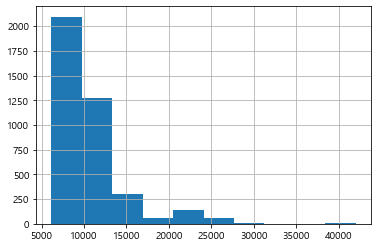

In [54]:
# hist =>히스토그램 막대그래프

df_last["평당분양가격"].hist(bins=10)

In [57]:
# displot =>결측치있는 그래프 불가, bins=> 데이터 개수
#.loc[행,열]

price=df_last.loc[df_last["평당분양가격"].notnull(),"평당분양가격"]

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

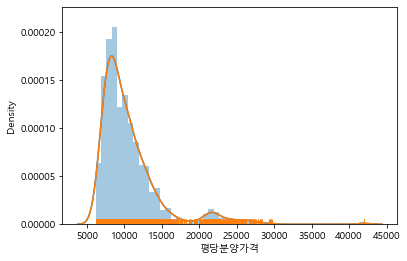

In [66]:
sns.distplot(price)
sns.distplot(price, hist=False, rug=True)

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

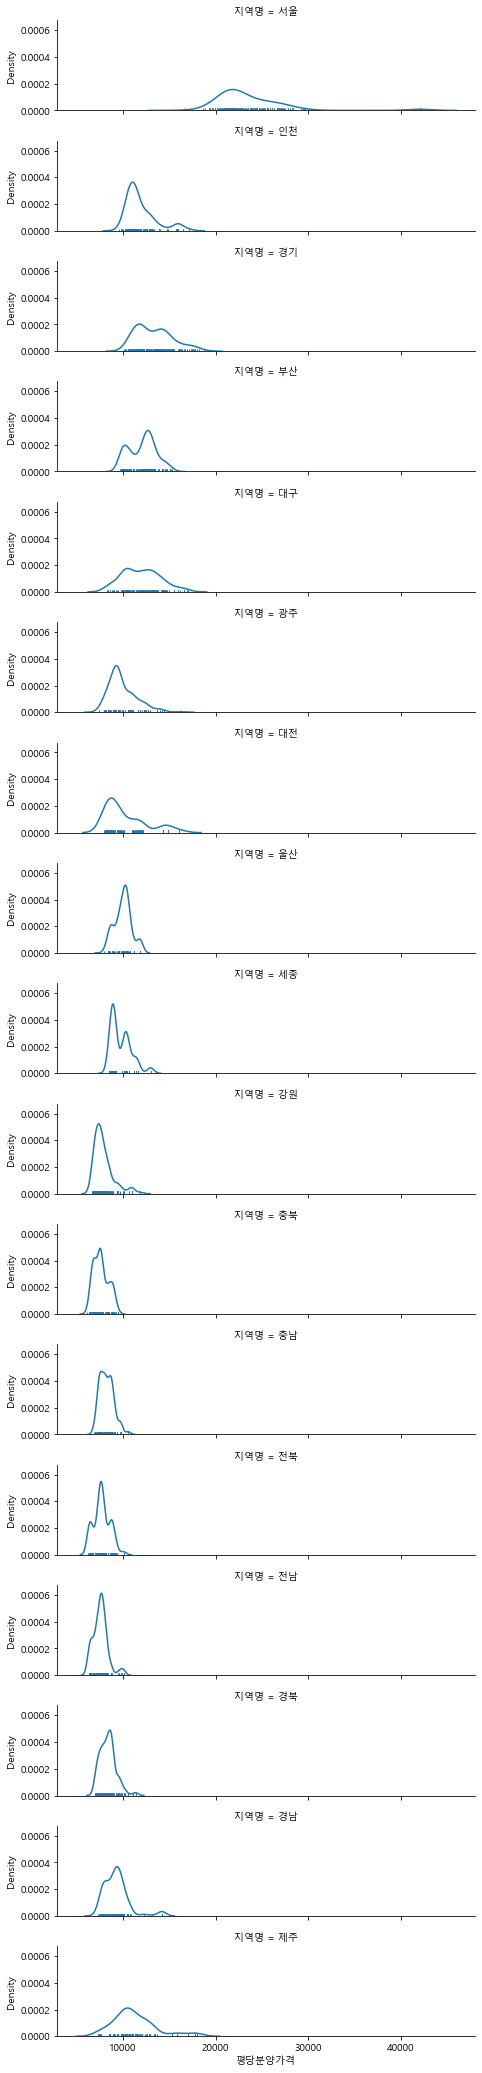

In [67]:
#subplot => rigde plot

g= sns.FacetGrid(df_last, row="지역명",height=1.7, aspect=4)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

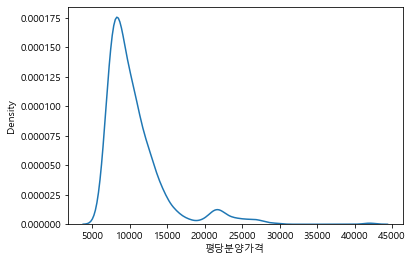

In [69]:
sns.kdeplot(price) #cumulateive=True=> 누적그래프

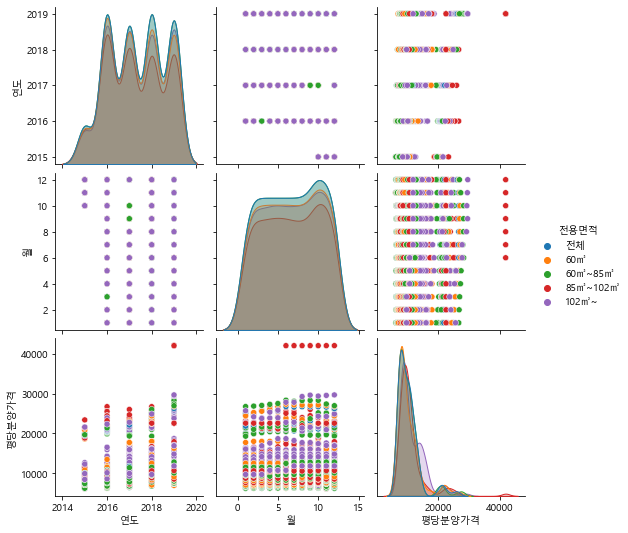

In [77]:
#subplot pairplot
nnull=df_last.loc[df_last["평당분양가격"].notnull(),
              ["연도","월","평당분양가격","지역명","전용면적"]]
sns.pairplot(nnull,hue="전용면적")

In [79]:
df_last["전용면적"].value_counts()

전체          867
60㎡         867
60㎡~85㎡     867
85㎡~102㎡    867
102㎡~       867
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터

In [91]:
ad.options.display.max_columns=100

In [89]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [90]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [98]:
#tidy data
#melt =>행을 열로 녹임

df_first_melt= df_first.melt(id_vars="지역",var_name="기간",value_name="평당분양가격")

In [100]:
df_first_melt.columns=["지역명","기간","평당분양가격"]

## 연도와 월 분리

In [117]:
#리스트 인덱싱
def parse_year(date):
    year=int(date.split("년")[0])
    return year


In [118]:
def parse_month(date):
    month=int(date.split("년")[-1].replace("월",""))
    return month

In [120]:
df_first_melt["연도"]=df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [122]:
df_first_melt["월"]=df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [125]:
df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
3138,경남,2018,10,3015.0,9949.5,85㎡~102㎡


In [127]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [133]:
cols=['지역명', '연도', '월', '평당분양가격'] 

## df_last,df_first 합치기

In [137]:
df_last_prepare=df_last.loc[df_last["전용면적"]=="전체",cols].copy()
df_last_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [140]:
df_first_prepare=df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


In [142]:
df=ad.concat([df_first_prepare,df_last_prepare])
df.head()

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0
2,대구,2013,12,8080.0
3,인천,2013,12,10204.0
4,광주,2013,12,6098.0


In [145]:
df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

## pivot table

In [148]:
t=ad.pivot_table(df, index="연도",columns="지역명",values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

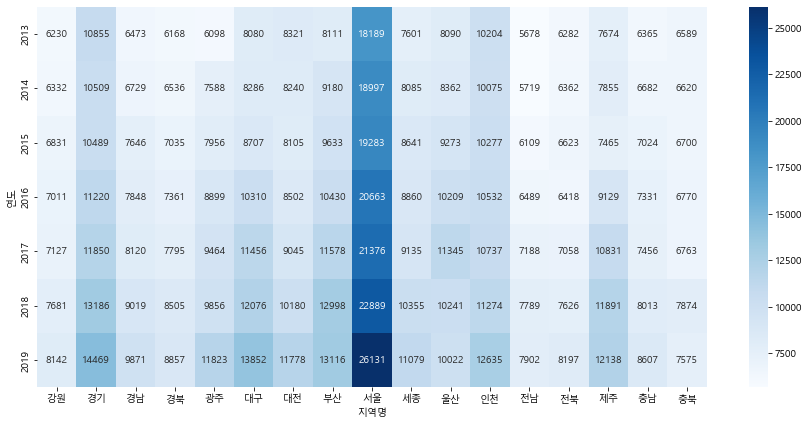

In [156]:
#sns.heatmap()
plt.figure(figsize=(15,7))
sns.heatmap(t, cmap="Blues", annot=True,fmt=".0f")

<AxesSubplot:xlabel='연도', ylabel='지역명'>

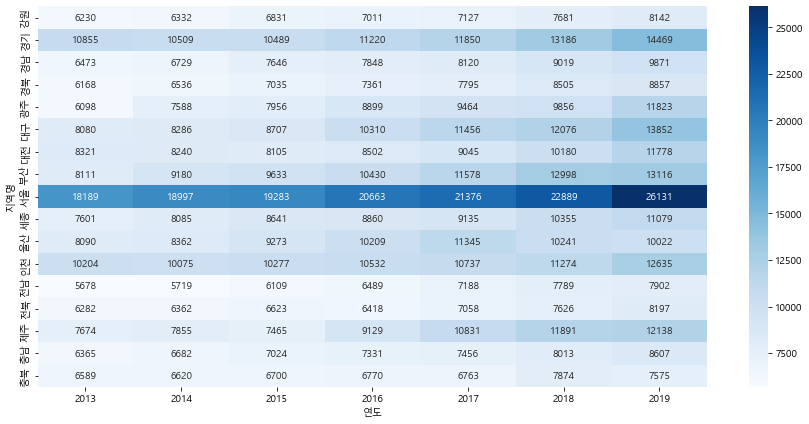

In [158]:
tt=t.T
plt.figure(figsize=(15,7))
sns.heatmap(tt, cmap="Blues", annot=True,fmt=".0f")

In [164]:
g=df.groupby(["연도","지역명"])["평당분양가격"].mean().unstack().round()

<AxesSubplot:xlabel='연도', ylabel='지역명'>

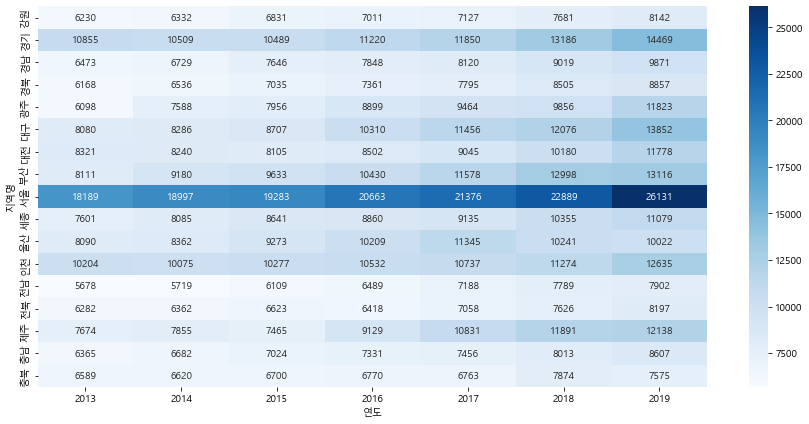

In [169]:
plt.figure(figsize=(15,7))
sns.heatmap(g.T,annot=True,fmt=".0f",cmap="Blues")

## df 시각화

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

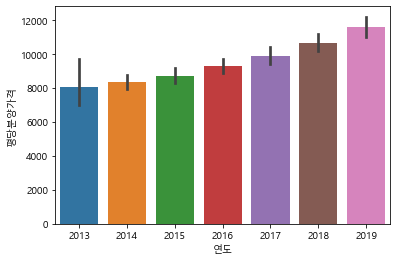

In [172]:
sns.barplot(data=df, x="연도", y="평당분양가격")

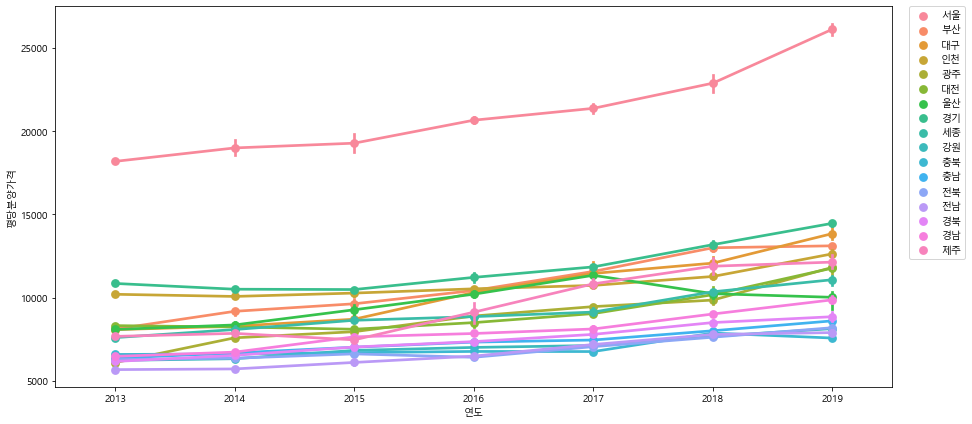

In [178]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x="연도",y="평당분양가격",hue="지역명")
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.)

(72, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

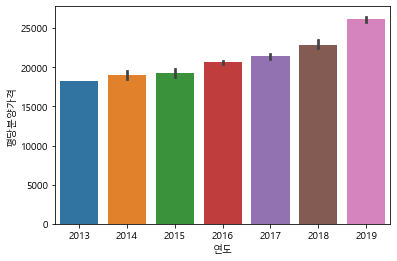

In [183]:
#서울만 barplot
df_seoul=df[df["지역명"]=="서울"]
print(df_seoul.shape)

s= sns.barplot(data=df_seoul,x="연도",y="평당분양가격")
s

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

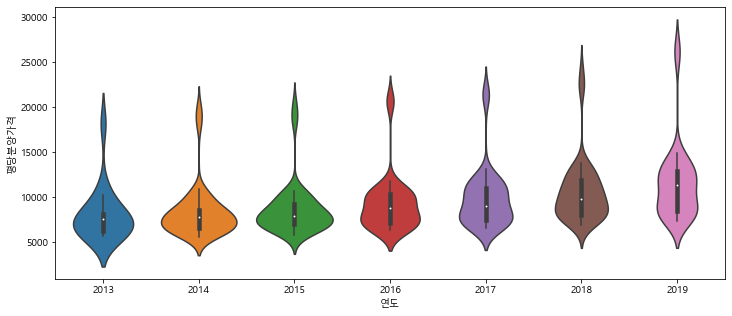

In [187]:
#violin, swarm plot 겹쳐그리기
plt.figure(figsize=(12,5))
sns.violinplot(data=df,x="연도",y="평당분양가격")
#sns.swarmplot(data=df,x="연도",y="평당분양가격",hue="지역명")

## 지역별 평당분양가격

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

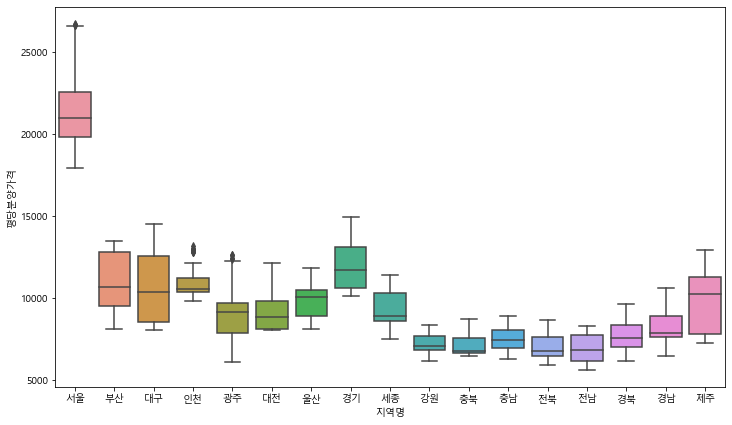

In [189]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

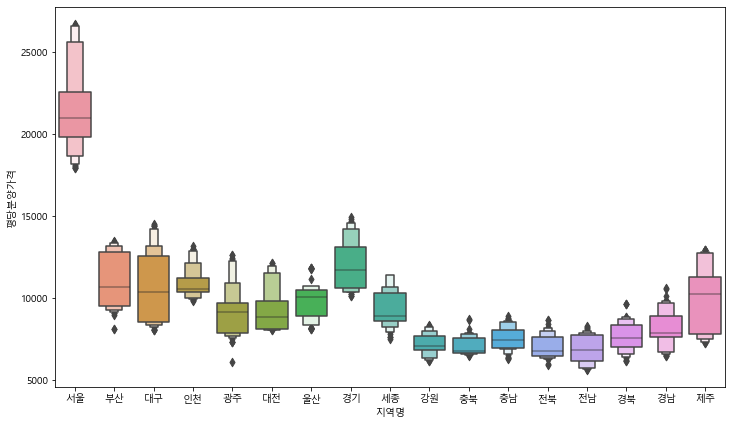

In [191]:
plt.figure(figsize=(12,7))
sns.boxenplot(data=df, x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

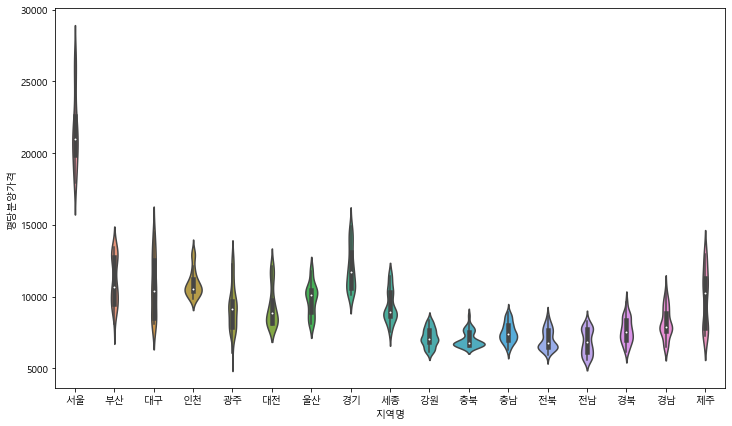

In [193]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df, x="지역명",y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

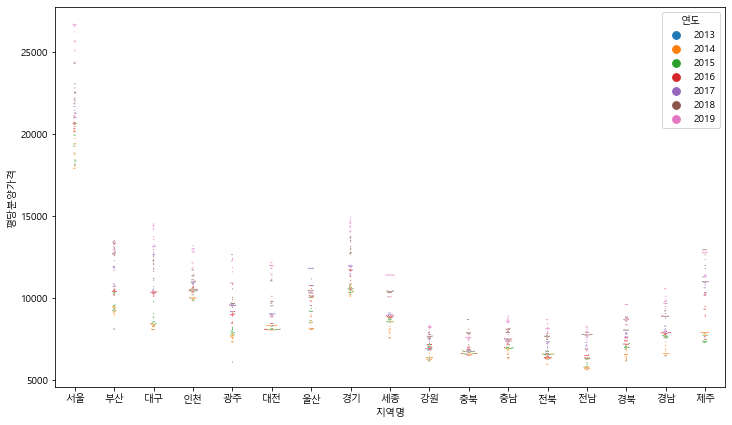

In [198]:
plt.figure(figsize=(12,7))
sns.swarmplot(data=df, x="지역명",y="평당분양가격",hue="연도",size=1)